<a href="https://colab.research.google.com/github/omnimanwani/FrostFlowss/blob/main/IcyOmni_FrostFlowss.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## **Introduction**
This project focuses on **optimizing budget distribution** across **multiple advertising channels**, including Google Ads, Microsoft Ads, and Meta Ads. The goal is to allocate the budget in a way that **maximizes conversions** while **minimizing the costs**.

**Problem:** AI-Driven Media Investment Plan Across Channels for E-commerce to maximize customer coversion rate.

**Solution:** Applying the concept of Multi Objective Optimization and NSGA-II algorithm for budget allocation, to handle conflicting factors and finding the optimized budget allocation ratio amongst different media channels.
    


## **Libraries and Versions**
The following libraries are used in this notebook:
    
```python
%pip install pandas==1.3.3
%pip install scikit-learn==0.24.2
%pip install numpy==1.21.2
%pip install matplotlib==3.4.3
%pip install seaborn==0.11.2
```
    


## **Approach and Methodology**
### **Data Processing**
Data cleaning and preprocessing steps are performed to ensure that the input data is in a usable format. This includes handling missing values, encoding categorical variables, and normalizing numerical features.

### **Algorithm**
The algorithm for budget allocation involves calculating **metrics with **
1. Cost per Click (CPC),
2. Cost per Conversion (CPC),
3. Revenue, and
4. Conversion Rate.

The budget is then distributed based on weighted factors that align with the campaign's goals.

 NSGA-II was used to **optimize the distribution of the budget** across different advertising channels. The objectives included
- Minimizing the Cost per Click (CPC) and Cost per Conversion (CPC),
- Maximizing Revenue and Conversion Rate

### **Assumptions**
1. All channels have at least a minimum of 10% of the total budget allocated.
2. Conversion rates and revenue data are accurate and reflect real-time performance.
3. There is atleast one conflicting factor in budget analysing and distribution (as Revenue and Cost/Click or Cost/Conversion)
    

##**Technique used:** Multi-Objective Optimization (MOO) Technique

### **What is MOO?**
Multi-Objective Optimization (MOO) involves optimizing multiple conflicting objectives simultaneously. In the context of budget allocation, these objectives include minimizing costs while maximizing conversions and revenue. MOO doesn't yield a single solution but rather a set of optimal solutions known as the Pareto front, where no objective can be improved without degrading another.

### **Why MOO?**
In real-world scenarios, especially in marketing and budget allocation, it's common to have multiple goals that conflict with each other. For example, a campaign might aim to minimize the cost per conversion while maximizing total revenue. MOO allows us to find a balance between these competing goals, providing a more comprehensive and effective solution.



## **NSGA-II (Non-dominated Sorting Genetic Algorithm II)**

#### **What is NSGA-II?**
NSGA-II is an evolutionary algorithm used for solving multi-objective optimization problems. It is one of the most popular and widely used algorithms in the MOO domain due to its effectiveness in finding a diverse set of Pareto-optimal solutions. The algorithm works by evolving a population of potential solutions over several generations, using mechanisms inspired by natural selection, such as crossover, mutation, and selection.

#### **How NSGA-II Works?**
1. **Initialization**: A random population of potential solutions is generated.
2. **Non-dominated Sorting**: The solutions are sorted into different fronts based on dominance, where a solution is said to dominate another if it is better in at least one objective and not worse in any other.
3. **Crowding Distance Calculation**: Within each front, solutions are ranked based on crowding distance, which helps maintain diversity in the population.
4. **Selection, Crossover, and Mutation**: The best solutions are selected to form a new population, which undergoes crossover and mutation to generate new solutions.
5. **Convergence**: Over several generations, the algorithm converges towards the Pareto front, providing a set of optimal solutions that balance the different objectives.

#### **Why NSGA-II?**
NSGA-II is particularly well-suited for budget allocation problems where multiple conflicting objectives need to be balanced. Its ability to provide a diverse set of solutions allows decision-makers to choose a solution that best aligns with their specific priorities.

### **Application in Budget Distribution**
In this project, NSGA-II was used to **optimize the distribution of the budget** across different advertising channels. The objectives included
- Minimizing the Cost per Click (CPC) and Cost per Conversion (CPC),
- Maximizing Revenue and Conversion Rate
- By using NSGA-II, we obtained a set of optimal budget allocations that balanced these conflicting objectives, allowing for more informed decision-making.


## **Libraries with versions**

In [ ]:
%pip install pandas==2.1.4 -q
%pip install scikit-learn==1.3.2 -q
%pip install matplotlib==3.7.1 -q
%pip install seaborn==0.13.1 -q
%pip install numpy==1.26.4 -q
%pip install deap==1.4 -q

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from deap import base, creator, tools, algorithms
import random
import matplotlib.pyplot as plt

## **Load Datasets**



In [ ]:
# Uploaded datasets on dropbox for easy access
# Load Data from Dataset 1.
google_ads = pd.read_csv('https://www.dropbox.com/scl/fi/eze1d73tkxg67n61pdale/googleads-performance.csv?rlkey=q8fv8lkhaw6grblgdo0iwl7cw&st=5u0ruuy2&dl=1')
meta_ads = pd.read_csv('https://www.dropbox.com/scl/fi/0q0d07dqqx17y3sw5vhdv/metaads-performance.csv?rlkey=z15r4884h3nznn54voh5ut7tg&st=hvygvp8n&dl=1')
microsoft_ads = pd.read_csv('https://www.dropbox.com/scl/fi/x6yluicpqr8mbqq7nsmu5/microsoftads-performance.csv?rlkey=1cpgw7u8jflk92z42zu5rff29&st=o3w3w0an&dl=1')
website_landings = pd.read_csv('https://www.dropbox.com/scl/fi/9exan41vrzjcv5tch44ll/website-landings.csv?rlkey=v5gzbk8qnjo6i1g6zjyid9a2p&st=gbw0tdn3&dl=1')

# Load Files fom dataset 2
##uncomment to load files from another dataset.
# google_ads = pd.read_csv('https://www.dropbox.com/scl/fi/v9kn1u024863gxe26k4m0/googlead-performance.csv?rlkey=nkraffyrf3qx0cduoa8hs0z0n&st=9xs0hswg&dl=1')
# meta_ads = pd.read_csv('https://www.dropbox.com/scl/fi/da5js4bvwe5r1nyu6m696/metaads-performance.csv?rlkey=pwljt8gqhjk06ny46sjop2zc6&st=b96daf6p&dl=1')
# microsoft_ads = pd.read_csv('https://www.dropbox.com/scl/fi/af3egw46u8t14k5hw093e/microsoftads-performance.csv?rlkey=fmuqhz8cbhc36pi9a9i4jv1tz&st=c80m2u34&dl=1')
# website_ladings = pd.read_csv('https://www.dropbox.com/scl/fi/tw7lzuybe32d3psrtbe0g/website-landings.csv?rlkey=htsngc5k6i1ipqkecq6lfta9x&st=m8nsk26m&dl=1')

In [ ]:
meta_ads['Campaign type'] = 'Audience'
meta_ads = meta_ads.drop(columns=['Reach'])

google_ads['Platform'] = 'Google'
meta_ads['Platform'] = 'Meta'
microsoft_ads['Platform'] = 'Microsoft'

campaign_data = pd.concat([google_ads, meta_ads, microsoft_ads], ignore_index=True)
print(campaign_data)


            Date     Campaign type  Impressions  Clicks    Cost  Conversions  \
0     2024-01-01     Cross-network     143669.0   896.0   656.3          6.5   
1     2024-01-01   Display Network          3.0     0.0     0.0          0.0   
2     2024-01-01    Search Network       3701.0   251.0   496.5          4.5   
3     2024-01-01           YouTube      36211.0     8.0   115.2          0.0   
4     2024-01-02     Cross-network     183496.0  1172.0  1525.0          8.8   
...          ...               ...          ...     ...     ...          ...   
1612  2024-06-29          Shopping      29992.0   181.0   102.4          4.0   
1613  2024-06-30          Audience      10018.0   115.0    22.1          0.0   
1614  2024-06-30   Performance max      40481.0   328.0   275.3          2.0   
1615  2024-06-30  Search & content      40731.0   269.0   201.8          7.0   
1616  2024-06-30          Shopping      22174.0   159.0    89.0          1.0   

      Revenue   Platform  
0      1410.

In [ ]:
campaign_data = pd.concat([google_ads, meta_ads, microsoft_ads])

# Date,Campaign type,Impressions,Clicks,Cost,Conversions,Revenue
data = campaign_data
data['CPC'] = np.where(data['Clicks'] != 0, data['Cost'] / data['Clicks'], 0)
data['CPI'] = np.where(data['Impressions'] != 0, data['Cost'] / data['Impressions'], 0)
data['ROI'] = np.where(data['Cost'] != 0, data['Revenue'] / data['Cost'], 0)
print(data)

           Date     Campaign type  Impressions  Clicks    Cost  Conversions  \
0    2024-01-01     Cross-network     143669.0   896.0   656.3          6.5   
1    2024-01-01   Display Network          3.0     0.0     0.0          0.0   
2    2024-01-01    Search Network       3701.0   251.0   496.5          4.5   
3    2024-01-01           YouTube      36211.0     8.0   115.2          0.0   
4    2024-01-02     Cross-network     183496.0  1172.0  1525.0          8.8   
..          ...               ...          ...     ...     ...          ...   
716  2024-06-29          Shopping      29992.0   181.0   102.4          4.0   
717  2024-06-30          Audience      10018.0   115.0    22.1          0.0   
718  2024-06-30   Performance max      40481.0   328.0   275.3          2.0   
719  2024-06-30  Search & content      40731.0   269.0   201.8          7.0   
720  2024-06-30          Shopping      22174.0   159.0    89.0          1.0   

     Revenue   Platform        CPC       CPI       

## **Dataset Training**

In [ ]:
X = data[['Impressions', 'Clicks', 'Cost', 'Campaign type', 'Platform']]  # Feature matrix
y_conversions = data['Conversions']  # Target for conversions
y_revenue = data['Revenue']  # Target for revenue

# One-hot encoding for categorical features (e.g., 'Campaign Type' and 'Platform')
X = pd.get_dummies(X)

# Split data into training and testing sets
X_train, X_test, y_train_conv, y_test_conv = train_test_split(X, y_conversions, test_size=0.3, random_state=42)
_, _, y_train_rev, y_test_rev = train_test_split(X, y_revenue, test_size=0.3, random_state=42)

## **Algorithm Implementation**
The following section contains the code implementation of data cleaning, preprocessing, and the budget allocation algorithm.

In [ ]:
# Initialize models
model_conversions = RandomForestRegressor(random_state=42)
model_conversions.fit(X_train, y_train_conv)

model_revenue = RandomForestRegressor(random_state=42)
model_revenue.fit(X_train, y_train_rev)

# Define the fitness function for NSGA-II
def fitness_function(individual):
    budget_google, budget_meta, budget_microsoft = individual

    # Ensure at least 10% budget allocation to each channel and sum of allocations = 1
    if any(budget < 0.1 for budget in individual) or not np.isclose(sum(individual), 1.0):
        return -float('inf'), -float('inf'), float('inf'), -float('inf')

    # Allocate budgets
    budget_allocation = {
        'Google': budget_google,
        'Meta': budget_meta,
        'Microsoft': budget_microsoft
    }

    # Create a budget column in the dataframe based on allocation
    data['Allocated_Budget'] = data.apply(lambda row: row['Cost'] * budget_allocation.get(row['Platform'], 0), axis=1)

    # Handle any missing or infinite values after allocation
    data['Allocated_Budget'].replace([np.inf, -np.inf], np.nan, inplace=True)
    data['Allocated_Budget'].fillna(0, inplace=True)

    # Use both 'Cost' and 'Allocated_Budget' in prediction
    X_budget = data[['Impressions', 'Clicks', 'Cost', 'Allocated_Budget', 'Campaign type', 'Platform']]
    X_budget = pd.get_dummies(X_budget)

    # Align columns with the training data
    missing_cols = set(X_train.columns) - set(X_budget.columns)
    for col in missing_cols:
        X_budget[col] = 0
    X_budget = X_budget[X_train.columns]

    # Predict conversions and revenue using the trained models
    predicted_conversions = model_conversions.predict(X_budget).sum()
    predicted_revenue = model_revenue.predict(X_budget).sum()

    # Calculate total cost
    total_cost = data['Allocated_Budget'].sum()

    # The fitness function returns negative predictions because we are maximizing these objectives
    return -predicted_conversions, -predicted_revenue, total_cost, -total_clicks

# NSGA-II setup
creator.create("FitnessMulti", base.Fitness, weights=(0.4, 0.25, -0.25, 0.1))  # Conversion-Centric Goal Weights
creator.create("Individual", list, fitness=creator.FitnessMulti)

toolbox = base.Toolbox()
toolbox.register("attr_float", random.uniform, 0, 1)  # Budget ratio
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, n=3)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("evaluate", fitness_function)
toolbox.register("mate", tools.cxBlend, alpha=0.5)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=1, indpb=0.2)
toolbox.register("select", tools.selNSGA2)

# Create population and run the algorithm
population = toolbox.population(n=300)
algorithms.eaMuPlusLambda(population, toolbox, mu=100, lambda_=200, cxpb=0.7, mutpb=0.2, ngen=40, verbose=False)

# Analyze the results
front = tools.sortNondominated(population, len(population), first_front_only=True)[0]
best_individual = min(front, key=lambda ind: ind.fitness.values[2])

# Extract budget allocation
best_budget_google, best_budget_meta, best_budget_microsoft = best_individual

# Current best allocations (normalized to sum to 1)
total_allocation = best_budget_google + best_budget_meta + best_budget_microsoft

# Normalize the budgets so that their sum equals 1 (or 100%)
best_budget_google_normalized = best_budget_google / total_allocation
best_budget_meta_normalized = best_budget_meta / total_allocation
best_budget_microsoft_normalized = best_budget_microsoft / total_allocation


/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMulti' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "



Best Budget Allocation:
Google Ads: 28.27%
Meta Ads: 25.83%
Microsoft Ads: 45.90%


Cost/Click (CPC): 0.68
Cost/Impression (CPI): 0.00
Conversion Rate: 2.90%


## **Output from model**

In [ ]:
# Print the normalized budget allocations
print(f'\nBest Budget Allocation:')
print(f'Google Ads: {best_budget_google_normalized * 100:.2f}%')
print(f'Meta Ads: {best_budget_meta_normalized * 100:.2f}%')
print(f'Microsoft Ads: {best_budget_microsoft_normalized * 100:.2f}%')

# Re-allocate the best-found budget
data['Allocated_Budget'] = data.apply(lambda row: row['Cost'] * {
    'Google': best_budget_google,
    'Meta': best_budget_meta,
    'Microsoft': best_budget_microsoft
}.get(row['Platform'], 0), axis=1)

# Handle any missing or infinite values in final allocation
data['Allocated_Budget'].replace([np.inf, -np.inf], np.nan, inplace=True)
data['Allocated_Budget'].fillna(0, inplace=True)

# Calculate metrics
total_clicks = data['Clicks'].sum()
total_impressions = data['Impressions'].sum()
total_cost = data['Allocated_Budget'].sum()
total_revenue = data['Revenue'].sum()
total_conversions = data['Conversions'].sum()

cpc = total_cost / total_clicks
cpi = total_cost / total_impressions
conversion_rate = total_conversions / total_clicks

print("\n")
print(f'Cost/Click (CPC): {cpc:.2f}')
print(f'Cost/Impression (CPI): {cpi:.2f}')
print(f'Conversion Rate: {conversion_rate:.2%}')


Best Budget Allocation:
Google Ads: 28.27%
Meta Ads: 25.83%
Microsoft Ads: 45.90%


Cost/Click (CPC): 0.68
Cost/Impression (CPI): 0.00
Conversion Rate: 2.90%


In [ ]:
# Predict on the test set
y_pred_conv = model_conversions.predict(X_test)
y_pred_rev = model_revenue.predict(X_test)

In [ ]:
# Calculate MSE
mse_conv = mean_squared_error(y_test_conv, y_pred_conv)
mse_rev = mean_squared_error(y_test_rev, y_pred_rev)

# Calculate R-squared
r2_conv = r2_score(y_test_conv, y_pred_conv)
r2_rev = r2_score(y_test_rev, y_pred_rev)

In [ ]:
print(f'MSE for Conversions: {mse_conv:.2f}')
print(f'MSE for Revenue: {mse_rev:.2f}')
print(f'R-squared for Conversions: {r2_conv:.2f}')
print(f'R-squared for Revenue: {r2_rev:.2f}')

MSE for Conversions: 39.86
MSE for Revenue: 2808838.47
R-squared for Conversions: 0.87
R-squared for Revenue: 0.83


Text(0.5, 1.0, 'Actual vs Predicted Conversions')

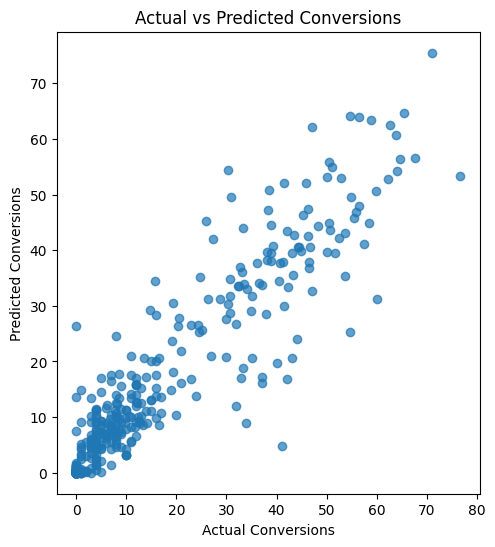

In [ ]:
# Plot actual vs predicted values for conversions
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_test_conv, y_pred_conv, alpha=0.7)
plt.xlabel('Actual Conversions')
plt.ylabel('Predicted Conversions')
plt.title('Actual vs Predicted Conversions')

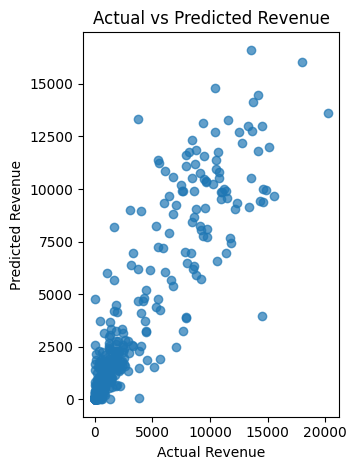

In [ ]:
# Plot actual vs predicted values for revenue
plt.subplot(1, 2, 2)
plt.scatter(y_test_rev, y_pred_rev, alpha=0.7)
plt.xlabel('Actual Revenue')
plt.ylabel('Predicted Revenue')
plt.title('Actual vs Predicted Revenue')

plt.tight_layout()
plt.show()


## **Input Section**
Enter the input budget to get budget allocation.

In [ ]:
# Take input from the user
total_budget = float(input("Enter the total budget in USD: "))

# Calculate the budget for each channel
google_ads_budget = total_budget * best_budget_google_normalized
meta_ads_budget = total_budget * best_budget_meta_normalized
microsoft_ads_budget = total_budget * best_budget_microsoft_normalized

Enter the total budget in USD: 1000



## **Results**
The results from the algorithm are presented below, including budget allocation for each channel and visualizations.

In [ ]:
# Display the allocated budget for each channel
print(f"\nInput: {total_budget:.2f} USD\n")
print(f"Output:")
print(f"Google Ads Budget: {google_ads_budget:.2f} USD")
print(f"Meta Ads Budget: {meta_ads_budget:.2f} USD")
print(f"Microsoft Ads Budget: {microsoft_ads_budget:.2f} USD")


Input: 1000.00 USD

Output:
Google Ads Budget: 282.74 USD
Meta Ads Budget: 258.30 USD
Microsoft Ads Budget: 458.96 USD


### **Visualizations**

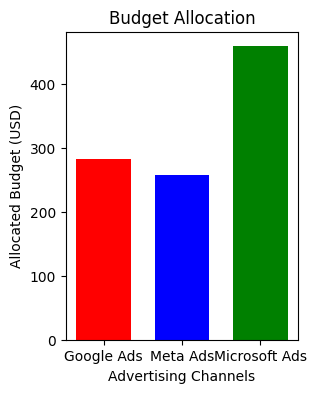

In [ ]:
# Data for the bar chart
budgets = [google_ads_budget, meta_ads_budget, microsoft_ads_budget]
channels = ['Google Ads', 'Meta Ads', 'Microsoft Ads']
colors = ['red', 'blue', 'green']

# Create the bar chart
plt.figure(figsize=(3, 4))
plt.bar(channels, budgets, color=colors, width=0.7)

# Add labels and title
plt.xlabel('Advertising Channels')
plt.ylabel('Allocated Budget (USD)')
plt.title('Budget Allocation')
plt.show()


## **Conclusion**
This project successfully demonstrates how to optimize budget distribution across various ad channels using a data-driven approach.
Potential improvements include
- Incorporating real-time data to further enhance the allocation strategy,
- Including experimenting with website landing data to analyse the peak time of conversions and embed with the other factors of metrics.
    

## New Section
## **References**
- [Gams](https://www.gams.com/latest/docs/T_LIBINCLUDE_MOO.html)
- [GeeksForGeeks](https://www.geeksforgeeks.org/grey-wolf-optimization-introduction/)
- [NPTEL IIT Guwahati](https://www.youtube.com/watch?v=Aq4pwGn5uWY&t=351s)
- [Wikipedia](https://en.wikipedia.org/wiki/Multi-objective_optimization)
